In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *

In [1]:
pip install pycaret[full]

In [ ]:
pip install interpret-community

**Data**

In [ ]:
#dataset
#from google.colab import files
#f=files.upload()

In [ ]:
df=pd.read_excel('xrd_new.xlsx', sheet_name='Sheet6')

Pycaret

In [ ]:
x=df.drop('Isc', axis=1)

reg = setup(data=x , target = 'FF' ,normalize=True , normalize_method='minmax',train_size=0.8,fold=3

             ,ignore_features=['schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6']

            ,remove_multicollinearity = True, multicollinearity_threshold= 0.9

            ,session_id=1543)

,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 32)"
4,Transformed data shape,"(27, 15)"
5,Transformed train set shape,"(21, 15)"
6,Transformed test set shape,"(6, 15)"
7,Ignore features,6
8,Numeric features,25
9,Preprocess,True


In [ ]:
best = compare_models(cross_validation=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4170,0.2950,0.5431,0.9578,0.0116,0.0094,0.1000
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0400
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,1.2900
rf,Random Forest Regressor,0.8604,1.1369,1.0663,0.8375,0.0253,0.0207,0.2500
ada,AdaBoost Regressor,1.0534,1.1980,1.0945,0.8288,0.0244,0.0243,0.1200
et,Extra Trees Regressor,1.3089,1.7824,1.3351,0.7453,0.0306,0.0307,0.1800
lar,Least Angle Regression,1.2531,2.2217,1.4905,0.6825,0.0340,0.0293,0.0600
lr,Linear Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.0700
ridge,Ridge Regression,1.1996,2.4122,1.5531,0.6553,0.0361,0.0286,0.0600
par,Passive Aggressive Regressor,1.3335,2.4576,1.5677,0.6488,0.0368,0.0320,0.0500


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

GBR

In [ ]:
gbr=create_model('gbr',cross_validation = False, return_train_score=True)
evaluate_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4170,0.2950,0.5431,0.9578,0.0116,0.0094
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Permutation Feature Importance => pfi

In [ ]:
#all rows(sample)
interpret_model(gbr, plot='pfi')

14it [00:00, 109.10it/s]


In [ ]:
interpret_model(gbr, plot='msa')

In [ ]:
#sample1
specific_rows1 = x.iloc[[0,1,2,3,4,5], :]

# Get pfi for the specific rows
interpret_model(gbr, data=specific_rows1, plot='pfi')

14it [00:00, 88.85it/s]


In [ ]:
interpret_model(gbr, data=specific_rows1, plot='msa')

In [ ]:
#sample2
specific_rows2 = x.iloc[[6,7,8], :]

interpret_model(gbr, data=specific_rows2, plot='pfi')

14it [00:00, 195.81it/s]


In [ ]:
interpret_model(gbr, data=specific_rows2, plot='msa')

In [ ]:
#sample3
specific_rows3 = x.iloc[[9,10,11,12,13,14], :]

interpret_model(gbr, data=specific_rows3, plot='pfi')

14it [00:00, 168.82it/s]


In [ ]:
interpret_model(gbr, data=specific_rows3, plot='msa')

In [ ]:
#sample4
specific_rows4 = x.iloc[[15,16,17,18,19,20], :]

interpret_model(gbr, data=specific_rows4, plot='pfi')

14it [00:00, 49.75it/s]


In [ ]:
interpret_model(gbr, data=specific_rows4, plot='msa')

In [ ]:
#sample5
specific_rows5 = x.iloc[[21,22,23,24,25,26], :]

interpret_model(gbr, data=specific_rows5, plot='pfi')

14it [00:00, 96.12it/s]


In [ ]:
interpret_model(gbr, data=specific_rows5, plot='msa')

Rf

In [ ]:
rf=create_model('rf',cross_validation = False, return_train_score=True)
evaluate_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.8604,1.1369,1.0663,0.8375,0.0253,0.0207
Train,0.6878,0.7775,0.8817,0.8501,0.0202,0.0159


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

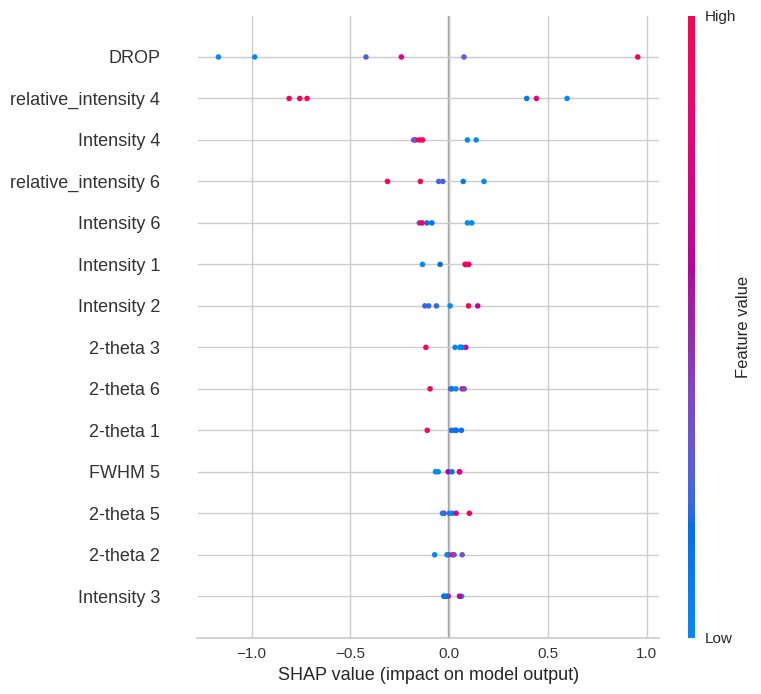

In [ ]:
#all rows(samples)
interpret_model(rf, plot='summary')

In [ ]:
#interpret_model(rf, plot='correlation')
interpret_model(rf, plot='pfi')

14it [00:00, 27.23it/s]


In [ ]:
#sample1
specific_rows1= x.iloc[[0, 1, 2,3,4,5], :]

# Get pfi for the specific rows
interpret_model(rf, data=specific_rows1, plot='pfi')

14it [00:00, 34.08it/s]


In [ ]:
#sample2
specific_rows2 = x.iloc[[6,7,8], :]

interpret_model(rf, data=specific_rows2, plot='pfi')

14it [00:00, 28.19it/s]


In [ ]:
#sample3
specific_rows3 = x.iloc[[9,10,11,12,13,14], :]

interpret_model(rf, data=specific_rows3, plot='pfi')

14it [00:00, 27.57it/s]


In [ ]:
#sample4
specific_rows4 = x.iloc[[15,16,17,18,19,20], :]

interpret_model(rf, data=specific_rows4, plot='pfi')

14it [00:00, 36.79it/s]


In [ ]:
#sample5
specific_rows5 = x.iloc[[21,22,23,24,25,26], :]

interpret_model(rf, data=specific_rows5, plot='pfi')

14it [00:00, 19.54it/s]


In [ ]:
df.info()

In [ ]:
x=df.drop('Isc', axis=1)

reg= setup(data=x , target = 'FF' ,normalize=True , normalize_method='minmax',train_size=0.8,fold=3
           ,ordinal_features= { 'DROP' : [1,2,3,4,5,6] }

             ,ignore_features=['schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6']

            ,remove_multicollinearity = True, multicollinearity_threshold= 0.9

            ,session_id=1543)

In [ ]:
best = compare_models(cross_validation=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4193,0.2960,0.5440,0.9577,0.0117,0.0094,0.1100
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0600
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,4.1100
rf,Random Forest Regressor,0.8990,1.2365,1.1120,0.8233,0.0263,0.0217,0.2200
ada,AdaBoost Regressor,1.1757,1.4449,1.2020,0.7935,0.0270,0.0273,0.1300
et,Extra Trees Regressor,1.3089,1.7824,1.3351,0.7453,0.0306,0.0307,0.1700
lr,Linear Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.2200
lar,Least Angle Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.2200
ridge,Ridge Regression,1.1996,2.4122,1.5531,0.6553,0.0361,0.0286,0.2500
par,Passive Aggressive Regressor,1.3335,2.4576,1.5677,0.6488,0.0368,0.0320,0.1200


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
gbr=create_model('gbr',cross_validation = False, return_train_score=True)
evaluate_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4193,0.2960,0.5440,0.9577,0.0117,0.0094
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…